In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
sales = pd.read_csv("SalesData.csv")
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


### 1. Compare Sales by region for 2016 with 2015 using bar chart

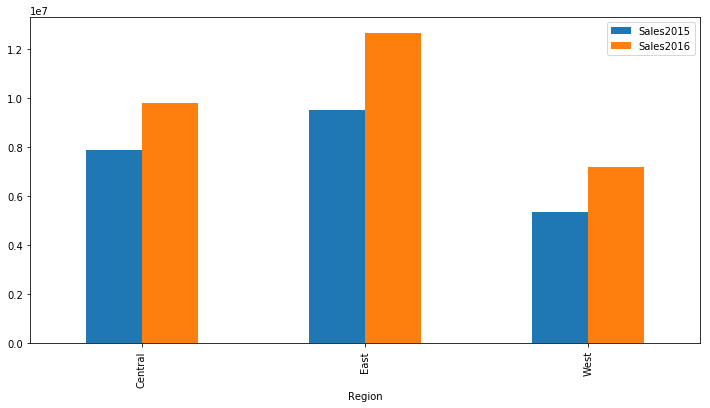

In [11]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)
sales1 = sales[['Region','Sales2015','Sales2016']].groupby('Region').sum()
sales1graph=sales1.plot.bar(figsize=(12,6))

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A440CC92E8>],
      dtype=object)

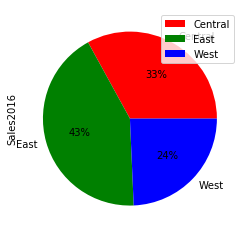

In [12]:
# sales2 = sales.groupby(['...']).aggregate({})
sales2 =sales[['Division','Region','Sales2016']].groupby('Region').sum()
sales2.plot(kind='pie', 
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', 
            fontsize=10, 
            subplots='true')

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

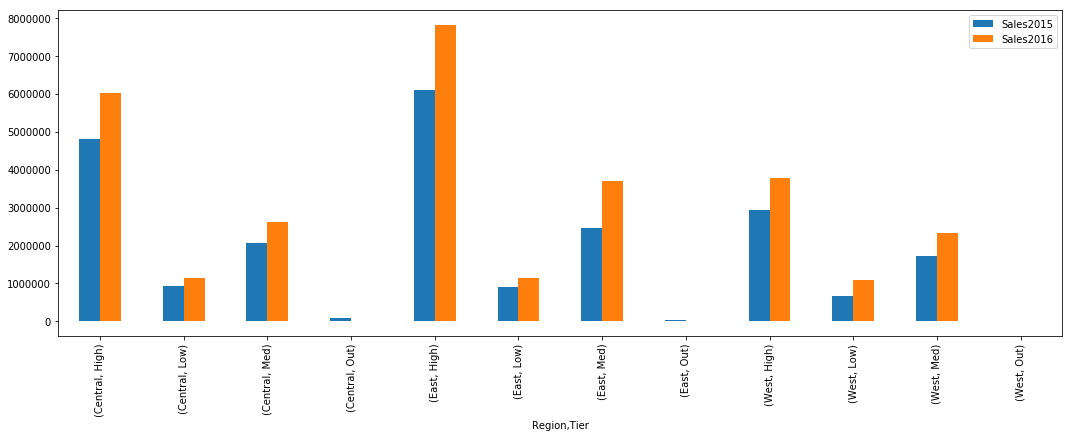

In [13]:
sales3 = sales[['Sales2015','Sales2016','Region','Tier']].groupby(['Region','Tier']).sum()

sales3graph=sales3.plot.bar(figsize=(18,6))

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [14]:
decline=sales[['State','Sales2015','Sales2016','Region']].groupby(['Region','State']).sum()
decline.reset_index(inplace=True)
decline=decline[decline.Region=='East']
decline[decline.Sales2016<decline.Sales2015]

,Region,State,Sales2015,Sales2016
25,East,NY,1725415.065,1703135.8


### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [15]:
decline_units=sales[['Tier','Units2015','Units2016','Division']].groupby(['Tier','Division']).sum()
decline_units.reset_index(inplace=True)
decline_units=decline_units[decline_units.Tier=="High"]
decline_units[decline_units.Units2016<decline_units.Units2015]

,Tier,Division,Units2015,Units2016


### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [16]:
def qtr(x):
    if (x=="Jan")or(x=="Feb")or(x=="Mar"):
        return "Q1"
    if (x=="Apr")or(x=="May")or(x=="Jun"):
        return "Q2"
    if (x=="Jul")or(x=="Aug")or(x=="Sep"):
        return "Q3"
    else:
        return "Q4"    
sales['Qtr']=sales.Month.apply(lambda x: qtr(x))

In [17]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


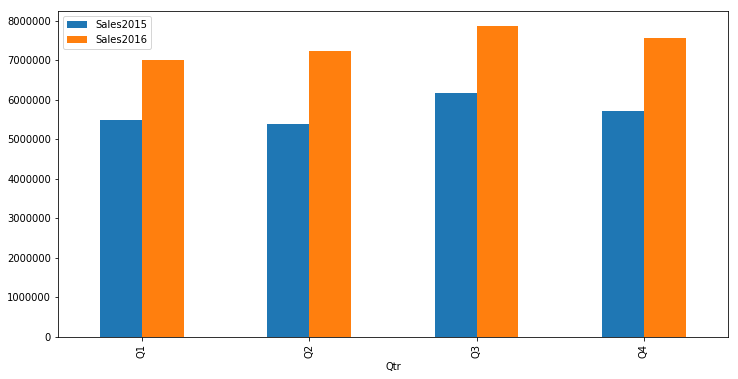

In [18]:
sales[['Qtr','Sales2015','Sales2016']].groupby('Qtr').sum().plot.bar(figsize=(12,6))

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [19]:
#8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
sales8 = sales[sales['Tier']!='Out']
sales8 = sales8[['Qtr','Sales2016','Tier']].groupby(['Qtr','Tier']).sum()
sales8 = sales8.round(decimals=0)
sales8 = sales8.stack() 
sales8 = sales8.unstack(level=0)
sales8

,Qtr,Q1,Q2,Q3,Q4
Tier,,,,,
High,Sales2016,3867719.0,4130953.0,4872559.0,4740002.0
Low,Sales2016,948833.0,890595.0,795178.0,742659.0
Med,Sales2016,2181402.0,2215814.0,2197058.0,2085207.0


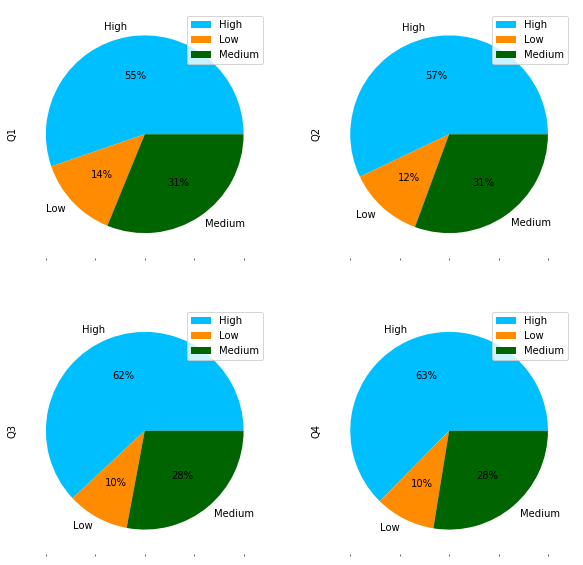

In [21]:
sales8.plot(kind='pie', 
            labels=['High', 'Low', 'Medium'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%',
            fontsize=10,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()